In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [103]:
data = pd.read_csv('Titanic Dataset.csv')

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# KNearest Classifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_predictions = gnb_model.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)

# Linear Support Vector Machine
lsvm_model = LinearSVC()
lsvm_model.fit(X_train, y_train)
lsvm_predictions = lsvm_model.predict(X_test)
lsvm_accuracy = accuracy_score(y_test, lsvm_predictions)

# Print model performance
print("Random Forest Model Performance:")
print(f'Accuracy: {rf_accuracy:.2f}')

print("\nLogistic Regression Model Performance:")
print(f'Accuracy: {lr_accuracy:.2f}')

print('KNN Model Performance:')
print(f'Accuracy: {knn_accuracy:.2f}')

print('Gaussian Naive Bayes Model Performance:')
print(f'Accuracy: {gnb_accuracy:.2f}')

print('Linear SVM Model Performance:')
print(f'Accuracy: {lsvm_accuracy:.2f}')

Random Forest Model Performance:
Accuracy: 0.82

Logistic Regression Model Performance:
Accuracy: 0.81
KNN Model Performance:
Accuracy: 0.72
Gaussian Naive Bayes Model Performance:
Accuracy: 0.78
Linear SVM Model Performance:
Accuracy: 0.77


c:\Users\susha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


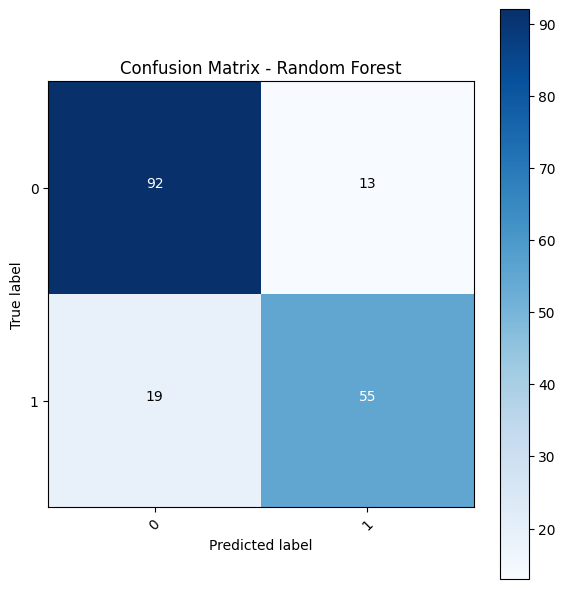

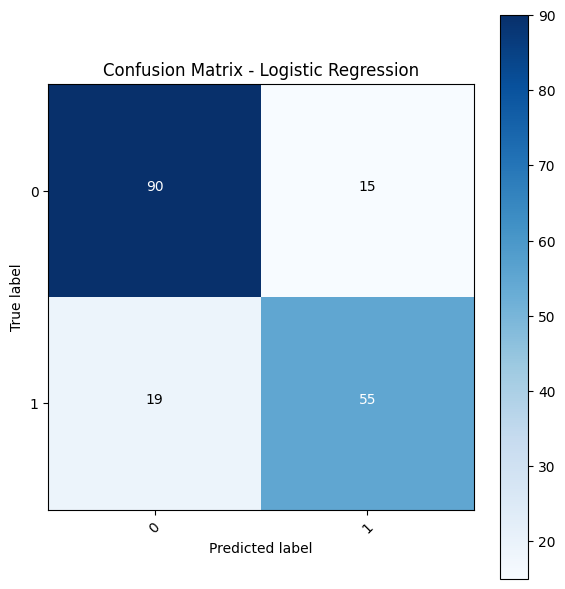

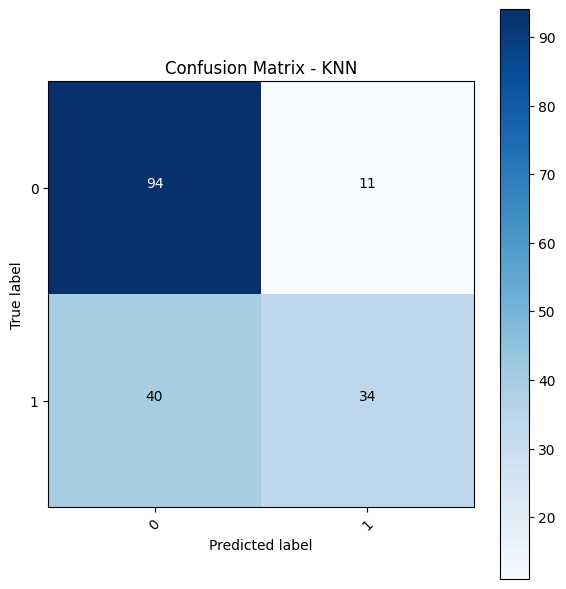

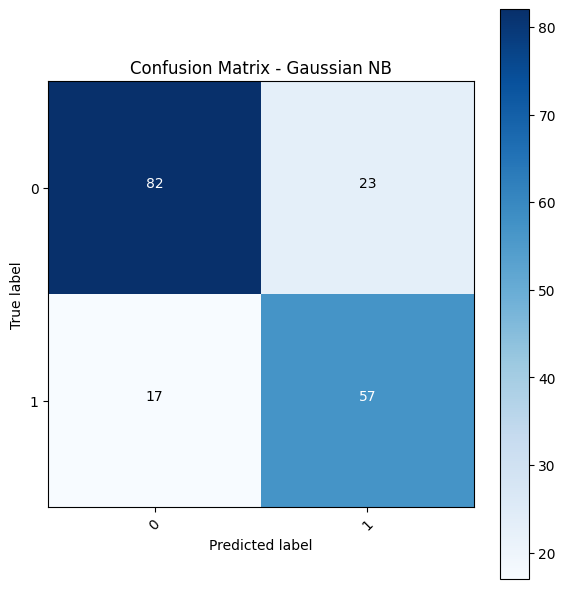

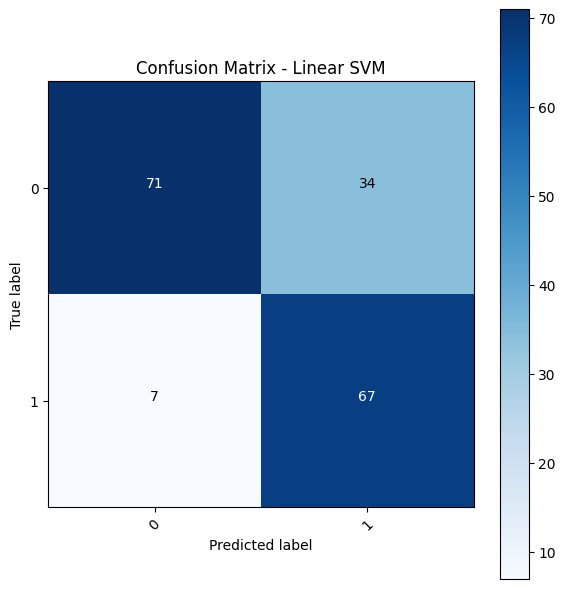

In [105]:
def plot_confusion_matrix(y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = [0, 1] 
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

models = [('Random Forest', rf_predictions), 
          ('Logistic Regression', lr_predictions), 
          ('KNN', knn_predictions), 
          ('Gaussian NB', gnb_predictions), 
          ('Linear SVM', lsvm_predictions)]

for model_name, predictions in models:
    plot_confusion_matrix(y_test, predictions, f'Confusion Matrix - {model_name}')
    plt.show()

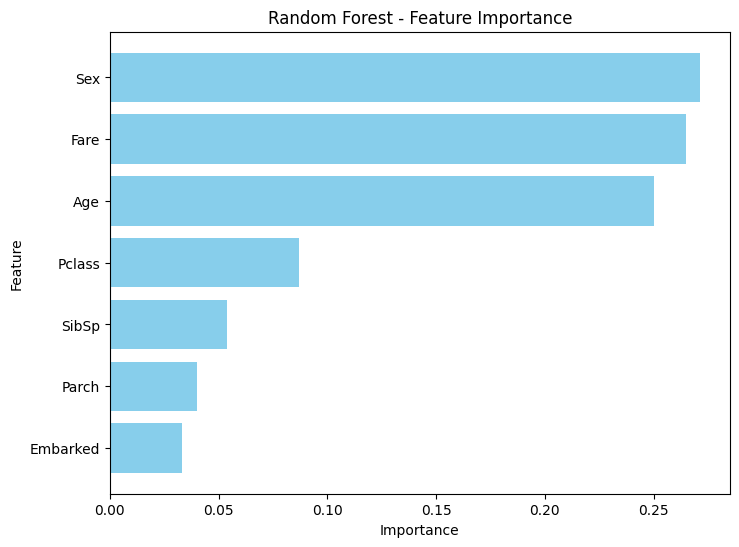

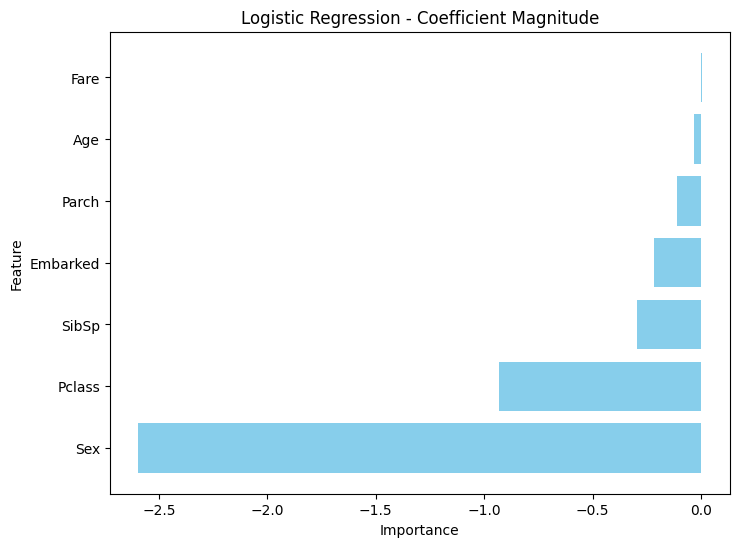

In [106]:
# As the Accuracy of the Random Forest and Logistic regression is highest. We can identify the non important attribute.
# Linear SVM and K Nearest Neighbors are giving most false negative and are most inaccurate one so ignoring those models

def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_ if hasattr(model, 'feature_importances_') else model.coef_[0]
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()  
    plt.show()

models = [('Random Forest', rf_model, 'Random Forest - Feature Importance'), 
          ('Logistic Regression', lr_model, 'Logistic Regression - Coefficient Magnitude')]

for model_name, model, plot_title in models:
    plot_feature_importance(model, X.columns, plot_title)
